# Coursework 2
### CID: 02476922

I, 02476922, certify that this assessed coursework is my own work, unless otherwise acknowledged, and includes no
plagiarism. I have not discussed my coursework with anyone else except when seeking clarification with the module
lecturer via email or on MS Teams. I have not shared any code underlying my coursework with anyone else prior to
submission.

### Question 1

In [2]:
### IMPORTS ###

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


C:\Users\frase\AppData\Local\Temp\ipykernel_34792\4059596620.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#import the datasets, splitting into columns based on space, with no header
components = pd.read_csv("q1_data/components.csv", sep = " ", header = None)
temperatures = pd.read_csv("q1_data/temperatures.csv", header = None)
spectra = pd.read_csv("q1_data/spectra.csv", sep = " ", header = None)
spectra.shape

(108, 199)

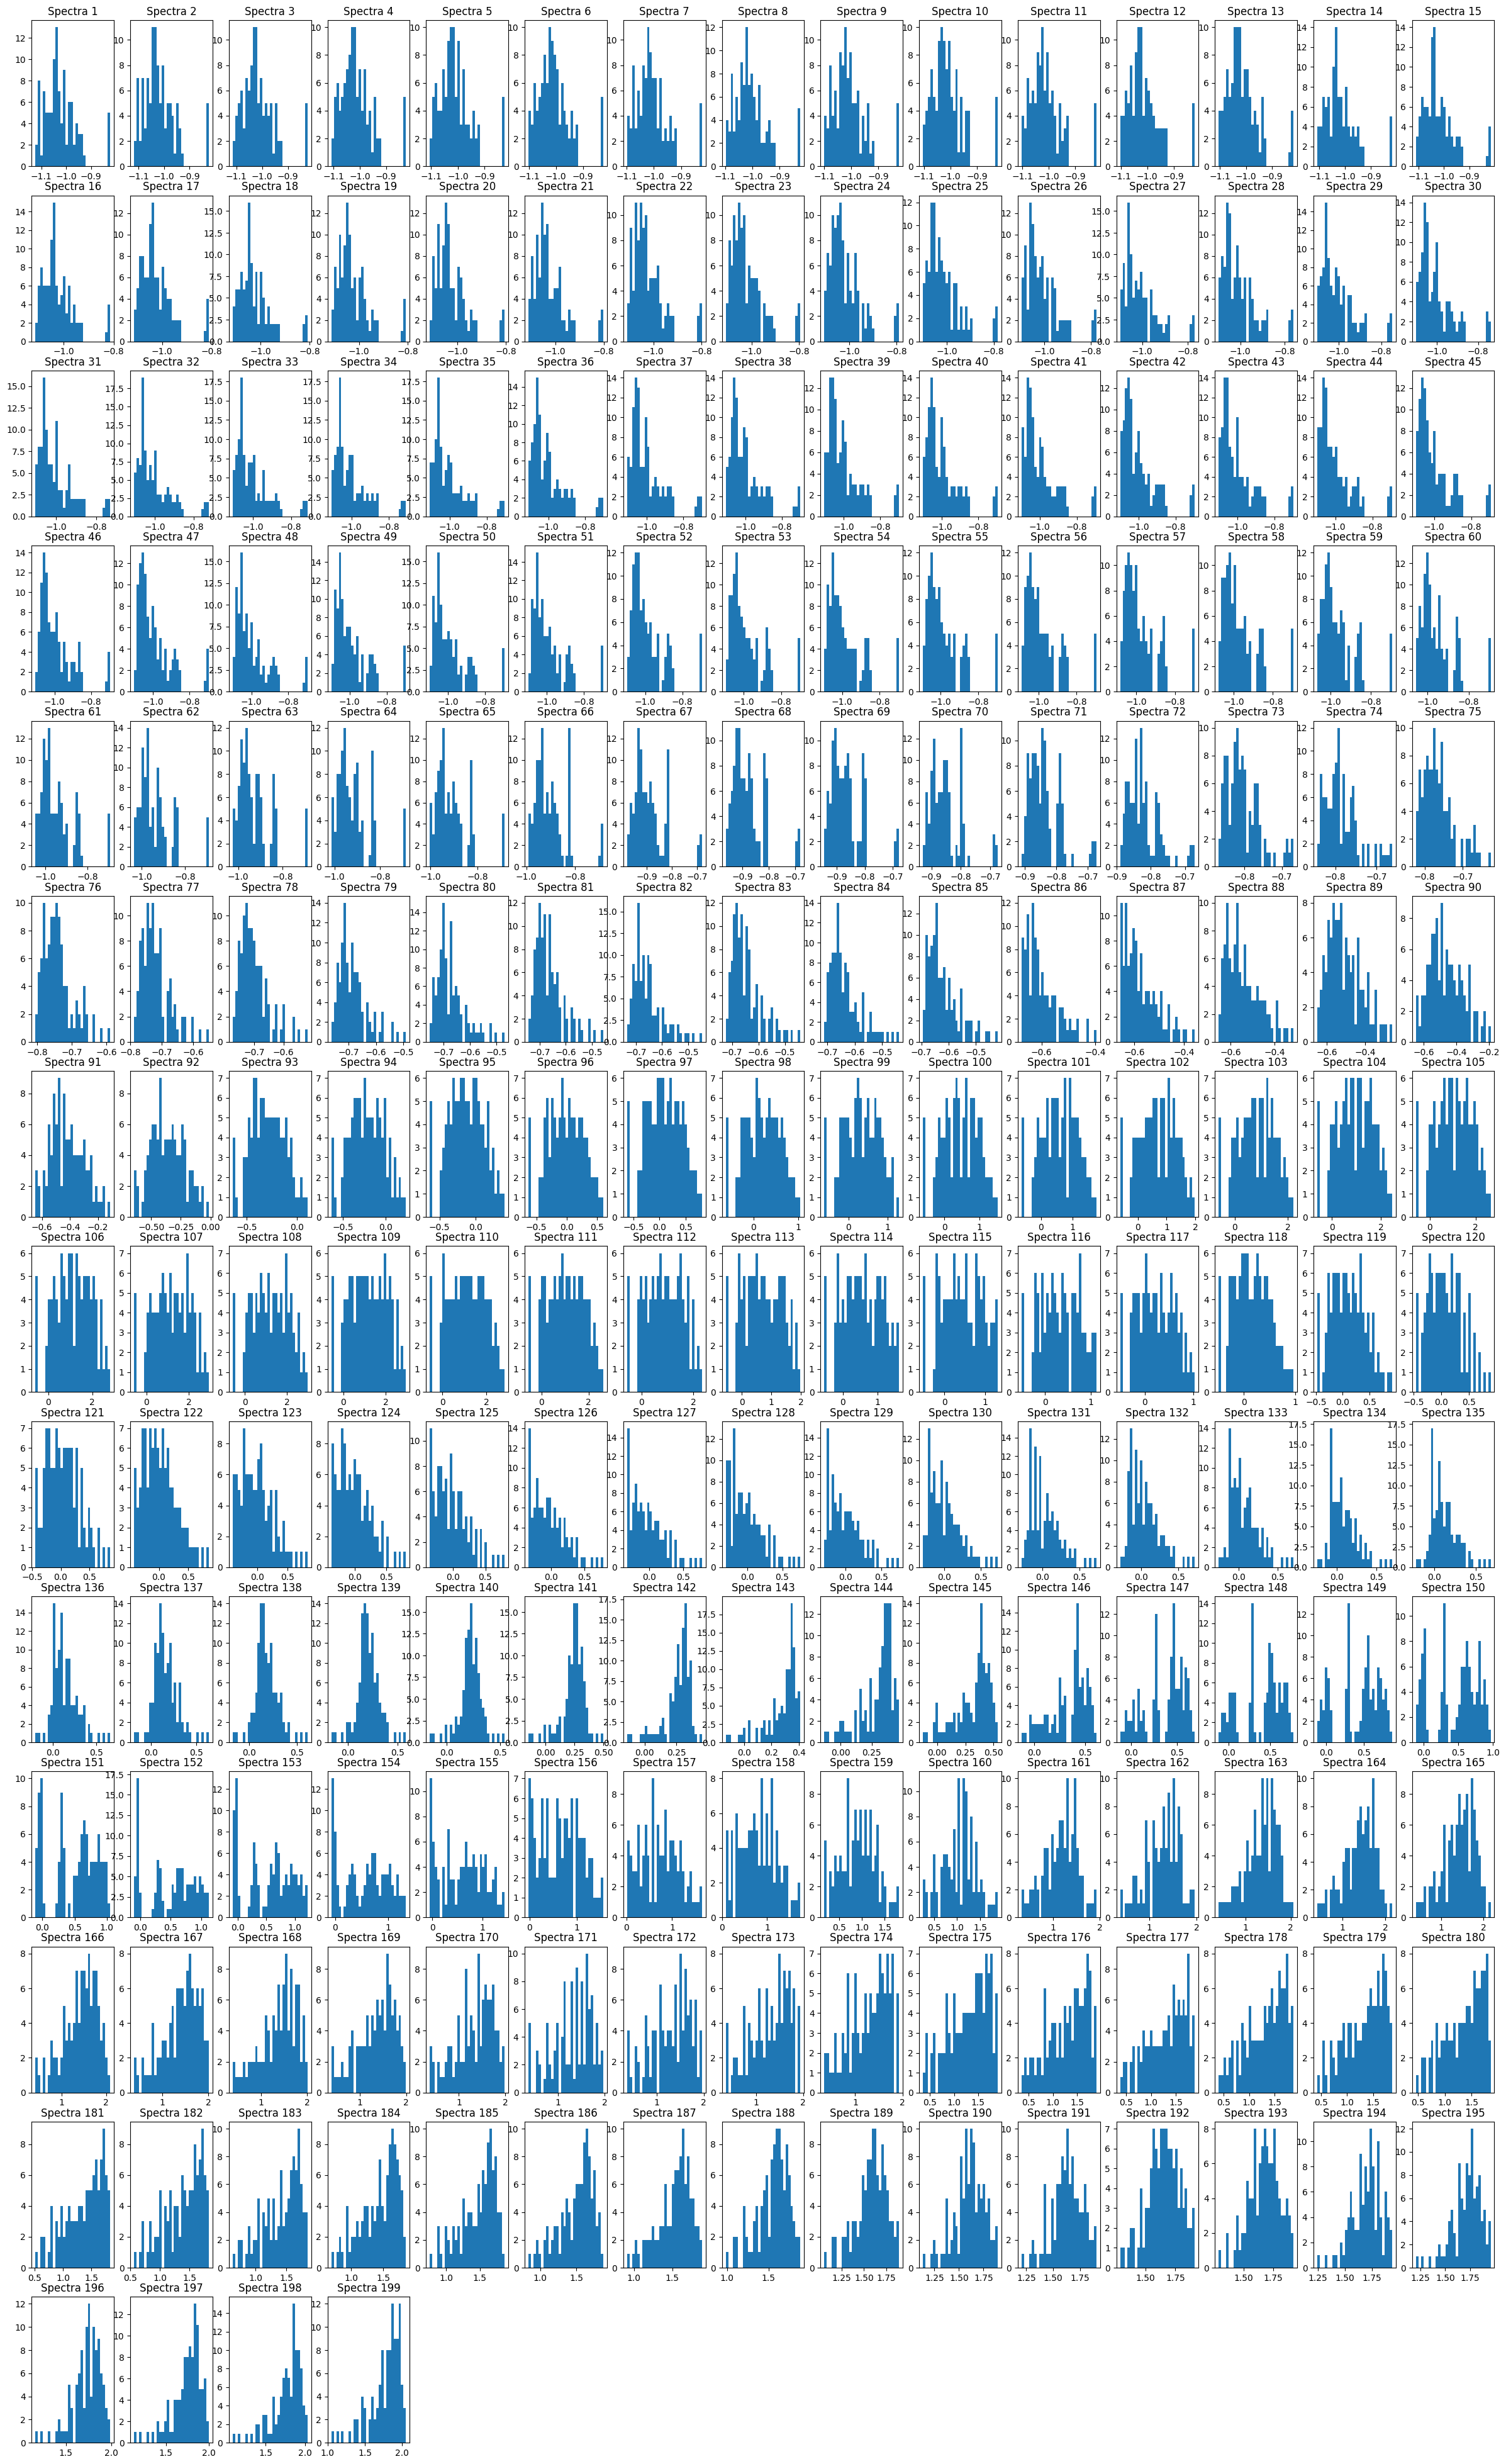

In [4]:
###Exploratory Data Analysis###
fig,axs = plt.subplots(nrows = 14, ncols = 15)
fig.set_figheight(50)
fig.set_figwidth(30)

for i in range(14):
    for j in range(15):
        if 15*i+j >198:
            fig.delaxes(axs[i,j])
            
        else:
            axs[i,j].hist(spectra.iloc[:,15*i+j],bins = 30)
            axs[i,j].set_title(f"Spectra {15*i+j + 1}")
plt.show()

In [19]:
#we do a ternary plot
print(components)
fig = px.scatter_ternary(components,a = 0, b = 1, c = 2)
fig.show()

            0         1         2
0    1.000000  0.000000  0.000000
1    0.664441  0.335559  0.000000
2    0.671541  0.163104  0.165355
3    0.666259  0.000000  0.333741
4    0.499822  0.500178  0.000000
..        ...       ...       ...
103  0.000000  1.000000  0.000000
104  0.000000  0.667071  0.332929
105  0.000000  0.499685  0.500315
106  0.000000  0.333868  0.666132
107  0.000000  0.000000  1.000000

[108 rows x 3 columns]


(array([22.,  0.,  0.,  0.,  0.,  0.,  0., 22.,  0.,  0.,  0.,  0.,  0.,
         0., 19.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 21.,  0.,  0.,  0.,
         0.,  0.,  0., 21.]),
 array([30.        , 31.33766667, 32.67533333, 34.013     , 35.35066667,
        36.68833333, 38.026     , 39.36366667, 40.70133333, 42.039     ,
        43.37666667, 44.71433333, 46.052     , 47.38966667, 48.72733333,
        50.065     , 51.40266667, 52.74033333, 54.078     , 55.41566667,
        56.75333333, 58.091     , 59.42866667, 60.76633333, 62.104     ,
        63.44166667, 64.77933333, 66.117     , 67.45466667, 68.79233333,
        70.13      ]),
 <BarContainer object of 30 artists>)

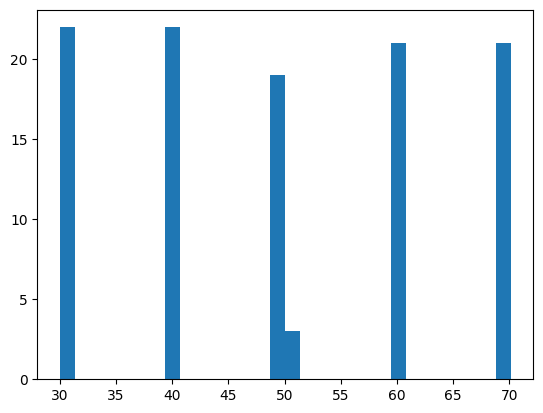

In [21]:
###Temperature###
plt.hist(temperatures,bins = 30)
#we see that it is grouped and chosen since the experimenter chose it as such

In [23]:
### HIERARCHICAL CLUSTERING ###
from scipy.spatial.distance import pdist, squareform

#talk about choices made in hierarchical clustering

#we shall use the euclidean distance
dist_data = pd.DataFrame(squareform(pdist(spectra)), index=spectra.index, columns=spectra.index)



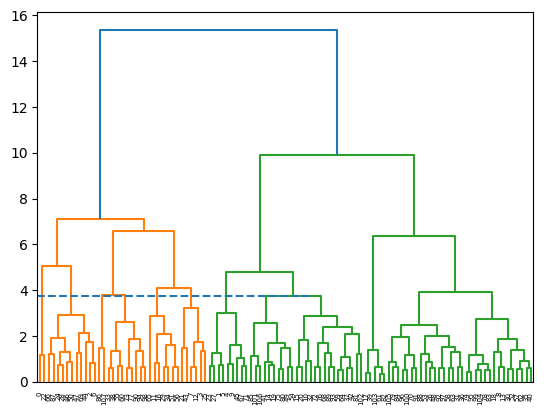

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram
hdata = linkage(spectra, method="complete")
dendrogram(hdata, labels=spectra.index)
plt.hlines(y=3.75, xmin=0, xmax=600, linestyle='dashed')
plt.show()